<a href="https://colab.research.google.com/github/DavidAtuesta/StatisticalAnalysisWithPython/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import xlrd

In [ ]:
df=pd.read_excel('PCA.xlsx', index_col=0)
df

,Emm T2,A T1,A T2,A/E T1,A/E T2,Ca T1,Ca T2,Ci T1,Ci T2,Ci/Ca T1,...,gtw T1,gtw T2,gtc T1,gtc T2,TleafEB T1,TleafEB T2,TleafCnd T1,TleafCnd T2,VPDleaf T1,VPDleaf T2
Emm T1,,,,,,,,,,,,,,,,,,,,,
1.864099,3.105538,15.600097,22.348709,8.368706,7.196405,368.623833,352.196167,65.517741,40.628727,0.177736,...,0.085716,0.117295,0.053780,0.073694,35.338982,35.989579,33.547800,35.798417,1.912219,2.281438
2.620557,2.434371,17.403966,19.690062,6.641324,8.088357,364.609500,360.344833,30.178196,1.821452,0.082769,...,0.085524,0.089735,0.053657,0.056309,34.315572,35.686067,33.498433,35.011183,2.661645,2.343302
2.581150,2.034097,18.434766,15.942409,7.224015,7.837584,362.669847,367.832167,45.868806,30.071373,0.126541,...,0.096558,0.077307,0.060619,0.048483,35.106468,35.256990,34.262039,34.715800,2.334225,2.271944
3.297948,3.287787,22.760100,24.343916,6.901292,7.404348,353.885833,350.884000,59.446968,51.794441,0.167983,...,0.127067,0.133112,0.079868,0.083689,34.643062,34.394178,34.060717,33.564400,2.249374,2.139457
2.646388,2.605178,19.002270,17.308920,7.180456,6.644045,361.511667,364.823000,31.664361,42.335839,0.087589,...,0.094368,0.088377,0.059229,0.055456,36.158645,34.756597,35.885183,33.835650,2.414430,2.562103
2.476759,2.471581,17.407395,20.068085,7.028296,8.119533,364.718400,359.602833,42.536763,2.200883,0.116629,...,0.090113,0.092054,0.056562,0.057773,35.076079,35.194954,34.318063,34.798633,2.433459,2.323487


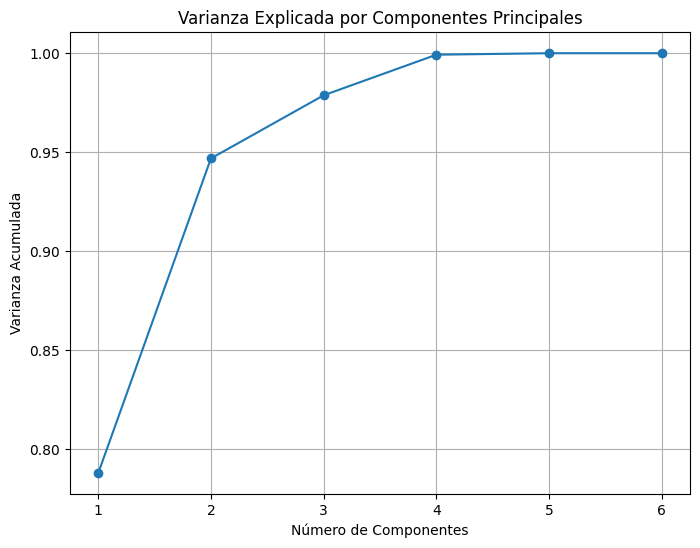

In [ ]:
pca = PCA()
pca.fit(df)
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()

plt.figure(figsize=(8,6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid(True)
plt.show()


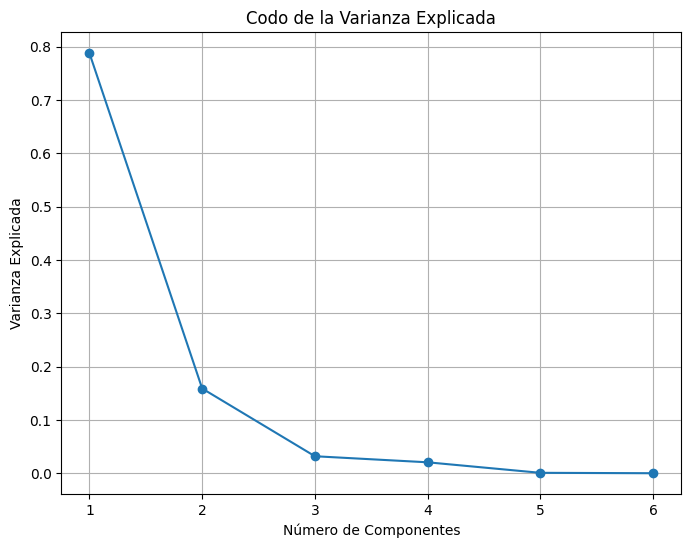

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.title('Codo de la Varianza Explicada')
plt.grid(True)
plt.show()


In [ ]:
pca = PCA(n_components=4)
principal_components = pca.fit_transform(df)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])



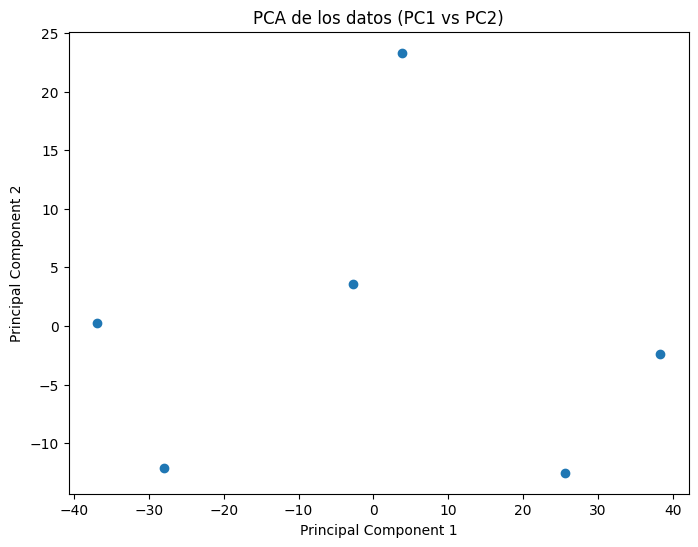

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA de los datos (PC1 vs PC2)')
plt.show()


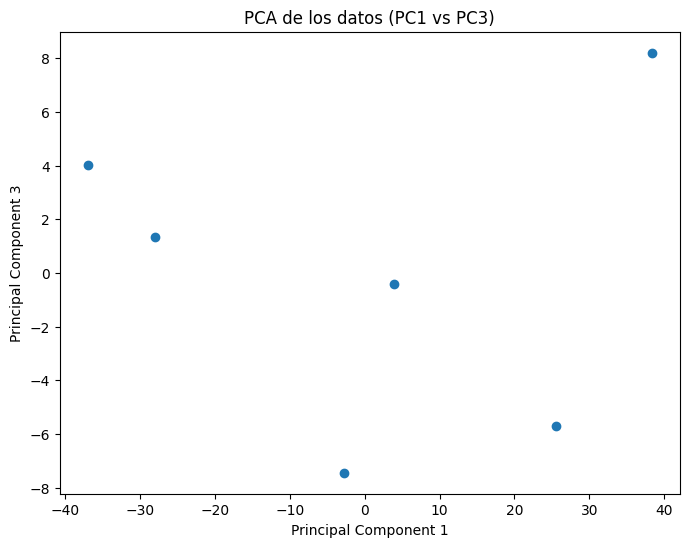

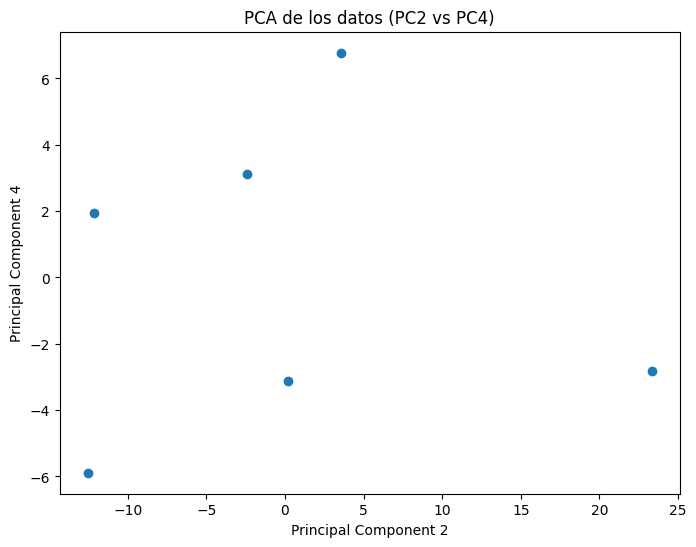

In [ ]:
# PC1 vs PC3
plt.figure(figsize=(8,6))
plt.scatter(principal_df['PC1'], principal_df['PC3'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA de los datos (PC1 vs PC3)')
plt.show()

# PC2 vs PC4
plt.figure(figsize=(8,6))
plt.scatter(principal_df['PC2'], principal_df['PC4'])
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 4')
plt.title('PCA de los datos (PC2 vs PC4)')
plt.show()


In [ ]:
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)


Varianza explicada por cada componente:
[0.78801409 0.15888996 0.03185891 0.0204862 ]


In [ ]:
# Asumiendo que ya has realizado el PCA y tienes el objeto pca
cargas_componentes = pca.components_

# Crear un DataFrame para visualizar mejor las cargas
cargas_df = pd.DataFrame(cargas_componentes, columns=df.columns, index=['PC1', 'PC2', 'PC3', 'PC4'])
print(cargas_df)


       Emm T2      A T1      A T2    A/E T1    A/E T2     Ca T1     Ca T2  \
PC1  0.011770  0.037779  0.055105  0.010182 -0.012749 -0.073986 -0.128761   
PC2 -0.009641  0.058317 -0.136092 -0.014222 -0.025528 -0.120945  0.305658   
PC3  0.035227  0.264184  0.301597 -0.067860  0.011590 -0.546857 -0.516104   
PC4 -0.039510  0.266417 -0.170722 -0.055333  0.049803 -0.547663  0.493277   

        Ci T1     Ci T2  Ci/Ca T1  ...    gtw T1    gtw T2    gtc T1  \
PC1  0.381854  0.692329  0.001080  ...  0.000342  0.000542  0.000216   
PC2 -0.661340  0.500212 -0.001776  ...  0.000100 -0.000639  0.000063   
PC3 -0.361151 -0.224533 -0.000727  ...  0.001496  0.001695  0.000944   
PC4  0.082742  0.042687  0.000493  ...  0.001673 -0.000922  0.001056   

       gtc T2  TleafEB T1  TleafEB T2  TleafCnd T1  TleafCnd T2  VPDleaf T1  \
PC1  0.000342    0.005202   -0.007072     0.001623    -0.007700   -0.006659   
PC2 -0.000403    0.026469   -0.020670     0.053582    -0.037207    0.007187   
PC3  0.001069   

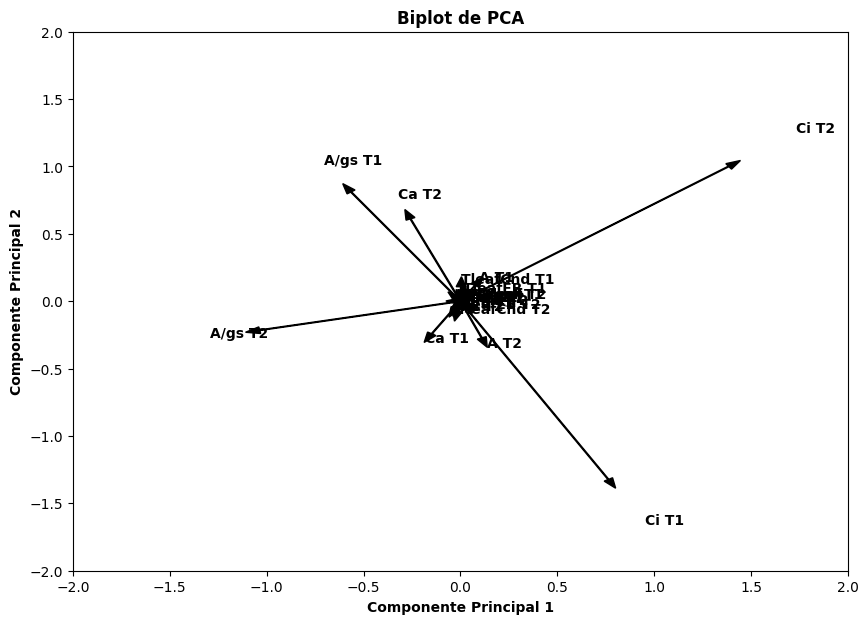

In [ ]:
def biplot(principal_df, pca, labels=None, xlim=None, ylim=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5, color='black')
    feature_vectors = pca.components_.T
    arrow_size, text_pos = 2.0, 2.5

    for i, v in enumerate(feature_vectors):
        plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1],
                  color='black', width=0.005, head_width=0.05)
        if labels is None:
            plt.text(v[0] * text_pos, v[1] * text_pos, "Var"+str(i+1), color='black', fontweight='bold')
        else:
            plt.text(v[0] * text_pos, v[1] * text_pos, labels[i], color='black', fontweight='bold')

    plt.xlabel('Componente Principal 1', fontweight='bold')
    plt.ylabel('Componente Principal 2', fontweight='bold')
    plt.title('Biplot de PCA', fontweight='bold')
    plt.grid(False)

    # Ajustar los límites de los ejes si se proporcionan
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    plt.show()

# Llamar a la función biplot con límites personalizados para los ejes
biplot(principal_df, pca, labels=df.columns, xlim=(-2, 2), ylim=(-2, 2))
